In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass
from tiffConverter import convert_to_numpy, convert_to_tiff
from pltwidget import runwidget
from helperFunctions import MoviePlotter

In [2]:
aligned_proj_location = "alignedProjections/aligned_baseCase_Filter_XCtip_20241004-100555.tif"
kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)

notAligned_proj_location = "data/fullTomoReconstructions_8_28_24.tif"
notAlignedProjections, notAligned_proj_scale_info = convert_to_numpy(notAligned_proj_location)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass

def plot_two_centroids(data_3d_1, data_3d_2):
    """
    Generates a scatter plot of centroids from two sets of 3D projection data.

    Parameters:
        data_3d_1 (numpy.ndarray): First 3D array (n, height, width).
        data_3d_2 (numpy.ndarray): Second 3D array (n, height, width).
    """
    def normalize_image(img):
        """Ensure all values are positive by squaring the image."""
        return np.square(img)

    def calculate_centroids(data_3d):
        """Compute centroids within the central 50% region of each 2D slice."""
        centroids = []
        for img in data_3d:
            normalized_img = normalize_image(img)

            # Define central 50% cropping region
            h, w = normalized_img.shape
            h_start, h_end = h // 5, 4 * h // 5
            w_start, w_end = w // 5, 4 * w // 5
            cropped_img = normalized_img[h_start:h_end, w_start:w_end]

            # Compute centroid
            centroid = center_of_mass(cropped_img)

            if centroid[0] is not None and centroid[1] is not None:
                centroids.append((centroid[0] - (h_end - h_start) / 2, 
                                  centroid[1] - (w_end - w_start) / 2))
            else:
                centroids.append((np.nan, np.nan))  # Handle empty images
        return np.array(centroids)

    # Validate inputs
    if data_3d_1.ndim != 3 or data_3d_2.ndim != 3:
        raise ValueError("Both input arrays must be 3D (n, height, width).")

    # Compute centroids
    centroids_1 = calculate_centroids(data_3d_1)
    centroids_2 = calculate_centroids(data_3d_2)

    # Extract coordinates
    y1, x1 = centroids_1[:, 0], centroids_1[:, 1]
    y2, x2 = centroids_2[:, 0], centroids_2[:, 1]

    # Create scatter plot
    plt.figure(figsize=(3.5, 3.5))  # One-column figure size
    
    # Plot red points (Pre-Alignment) first
    plt.scatter(x2, y2, color="red", s=15, alpha=0.7, label="Pre-Alignment")
    
    # Plot blue points (Post-Alignment) on top of red
    plt.scatter(x1, y1, color="blue", s=15, alpha=0.7, label="Post-Alignment")

    plt.gca().invert_yaxis()  # Align with image coordinates
    plt.xlabel("X Coordinate", fontsize=12)
    plt.ylabel("Y Coordinate", fontsize=12)
    plt.xlim(-110, 110)
    plt.ylim(-110, 110)

    # Custom legend with distinct background, moved to bottom right
    legend = plt.legend(fontsize=10, loc="lower right", frameon=True)
    legend.get_frame().set_facecolor("lightgray")  # Light gray background
    legend.get_frame().set_alpha(0.8)  # Slight transparency

    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

    # Set equal aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')

    plt.tight_layout()
    plt.savefig("centroid_plot.png", dpi=300, bbox_inches="tight")  # Export for publication
    plt.show()

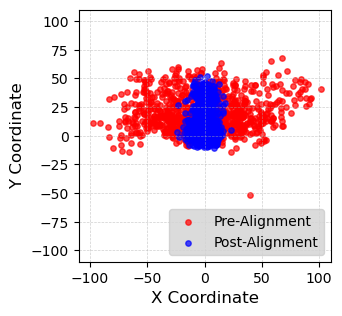

In [14]:
# Plot the centroids
plot_two_centroids(kevinProjections, notAlignedProjections)

(323.43219284749944, 449.3674533844005)
(650, 900)


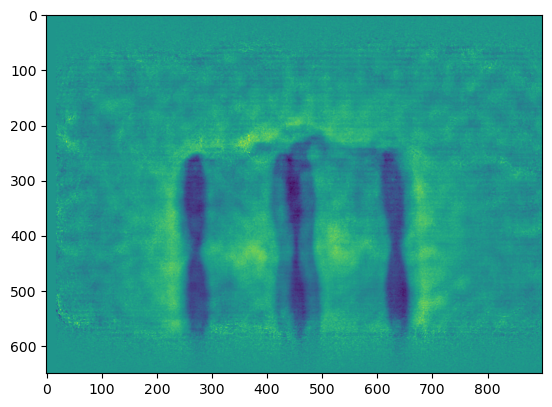

In [31]:
def normalize_image(img):
    """Shift the image to make all values positive."""
    return img - np.min(img)

centroid = center_of_mass(normalize_image(kevinProjections[0]))
print(centroid)
print(kevinProjections[0].shape)
plt.imshow(kevinProjections[0])
plt.show()

In [ ]:
# runwidget(kevinProjections[0:100])
MoviePlotter(notAlignedProjections[0:10,130:-130, 180:-180])